In [1]:
import pandas as pd

openrank_path = './open_rank_20236.csv'
openrank_data = pd.read_csv(openrank_path)

top_100_us = openrank_data.nlargest(100, 'rank')

# 计算value的最大值、最小值、均值和中位数
value_max = top_100_us['value'].max()
value_min = top_100_us['value'].min()
value_mean = top_100_us['value'].mean()
value_median = top_100_us['value'].median()

print("美国排名前一百项目的value分析：")
print(f"最大值: {value_max}")
print(f"最小值: {value_min}")
print(f"均值: {value_mean}")
print(f"中位数: {value_median}")



美国排名前一百项目的value分析：
最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996


In [2]:
df = pd.read_csv('./activity_2022.csv').head(10)
growth_rates = []

for index, row in df.iterrows():
    monthly_values = row[1:].values
    monthly_growth = [(monthly_values[i+1] - monthly_values[i]) / monthly_values[i] for i in range(len(monthly_values) - 1)]
    average_growth = sum(monthly_growth) / len(monthly_growth)
    growth_rates.append(average_growth)

average_growth_rate = 100 * sum(growth_rates) / len(growth_rates)
print("平均增长率", average_growth_rate)

平均增长率 1.2502691855077124


In [3]:
import pandas as pd

china_data = pd.read_csv('./china_2022.csv')
global_data = pd.read_csv('./global_2022.csv')

china_stats = china_data.describe()
global_stats = global_data.describe()
print("中国开源企业数据\n:")
print(china_stats)
print("全球开源企业数据:")
print(global_stats)

中国开源企业数据
:
       issue_comment    open_issue     open_pull  review_comment  \
count      10.000000     10.000000     10.000000        10.00000   
mean    61205.500000   9169.200000  16912.700000     19857.50000   
std     49332.487917   6810.653563  10068.922805     21115.07349   
min     11741.000000    752.000000   1823.000000      2113.00000   
25%     30943.500000   4625.250000   9376.750000      3120.00000   
50%     39141.000000   6889.500000  15953.000000     10851.00000   
75%     82179.500000  14225.500000  22483.250000     31507.75000   
max    167814.000000  22397.000000  35266.000000     60402.00000   

        merged_pull      rank         value  rankDelta    valueDelta  
count     10.000000  10.00000      10.00000  10.000000     10.000000  
mean   13764.100000   5.50000   40269.53400   5.300000   9265.007000  
std     7692.752064   3.02765   30905.17181   9.944848   5327.824003  
min     1165.000000   1.00000   12033.71000   0.000000   2329.360000  
25%     8067.250000  

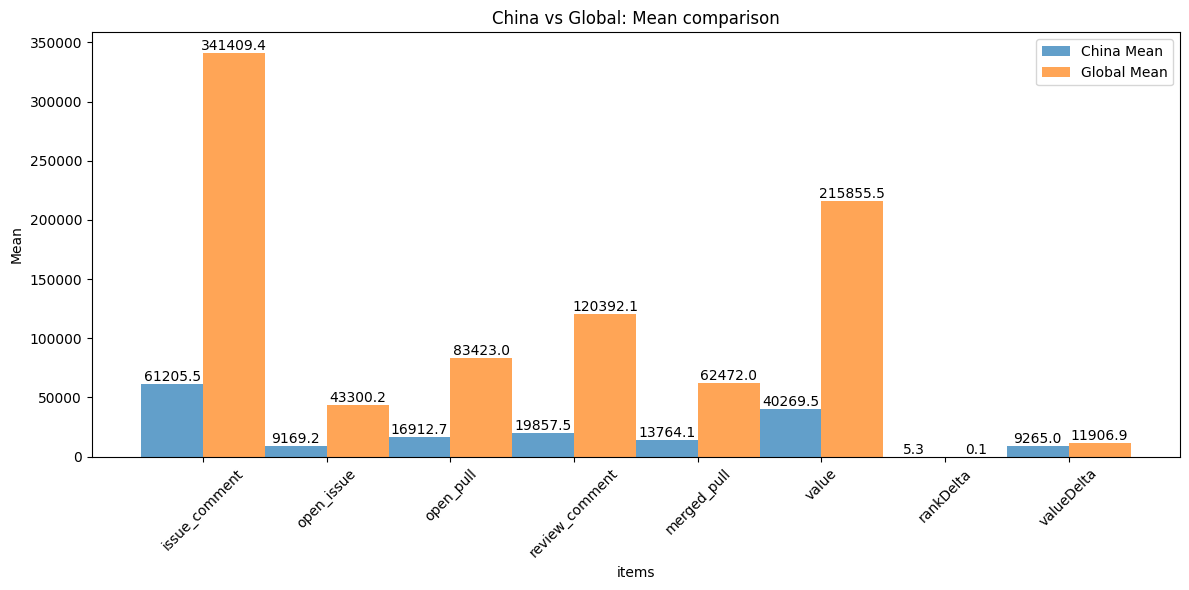

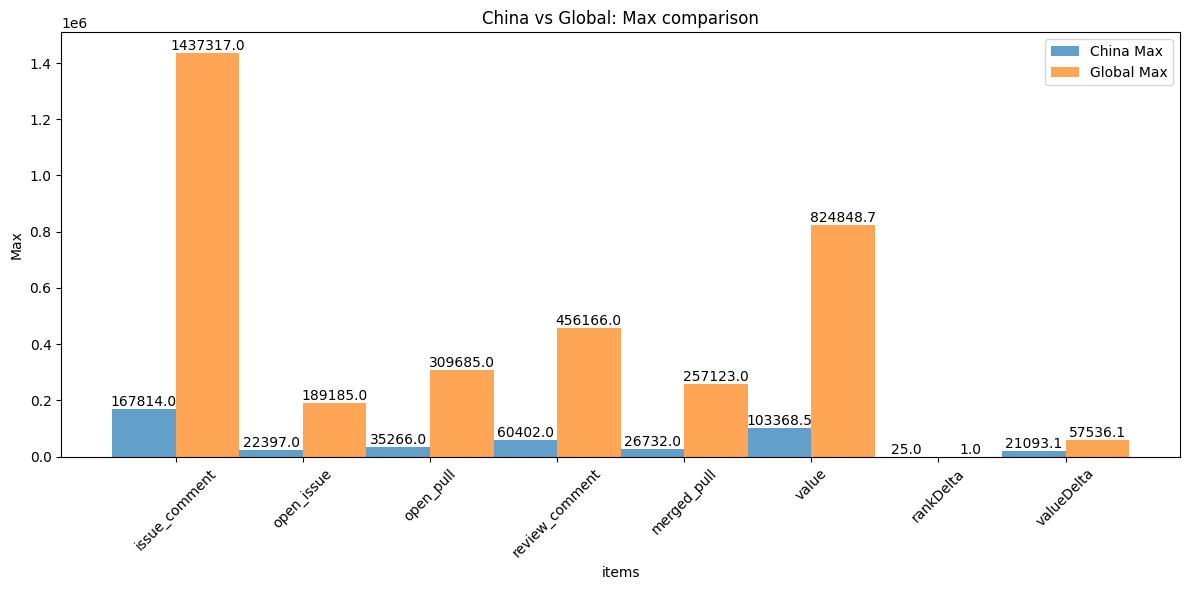

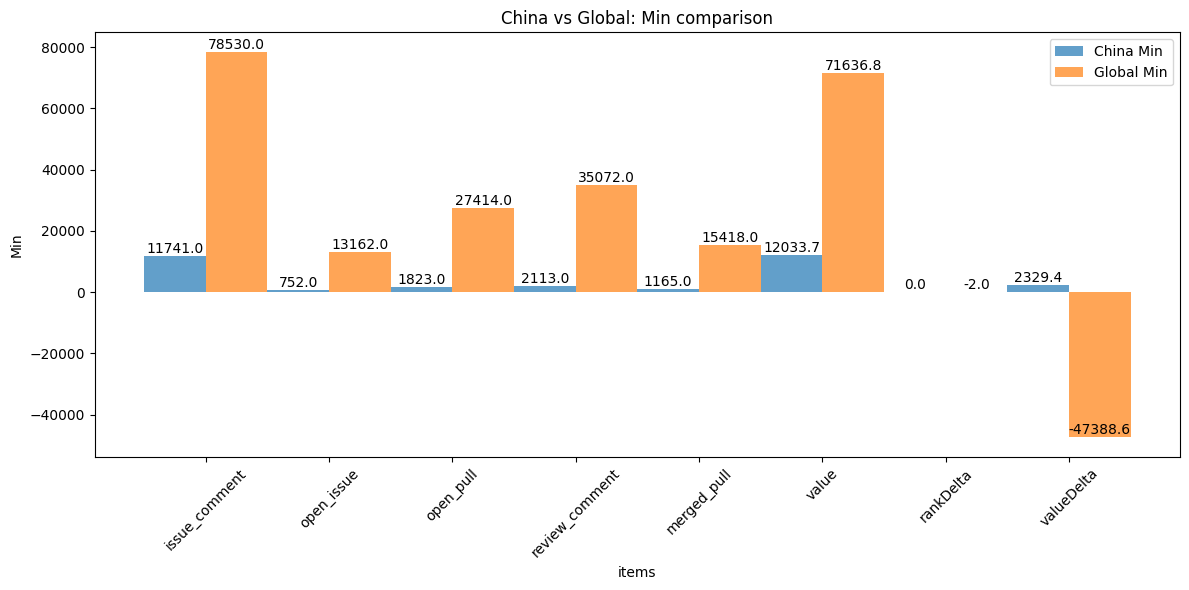

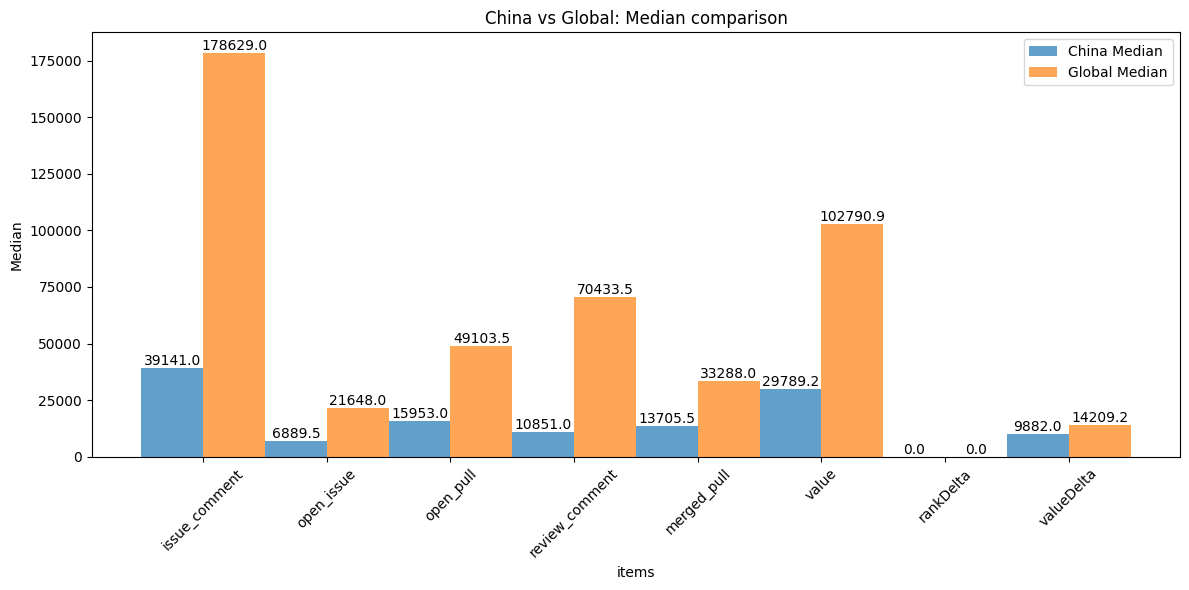

In [4]:
import numpy as np
import matplotlib.pyplot as plt

columns_to_analyze = ['issue_comment', 'open_issue', 'open_pull', 'review_comment', 'merged_pull', 'value', 'rankDelta', 'valueDelta']

china_stats = china_data[columns_to_analyze].agg(['mean', 'max', 'min', 'median']).transpose()
china_stats.columns = ['China_Mean', 'China_Max', 'China_Min', 'China_Median']
global_stats = global_data[columns_to_analyze].agg(['mean', 'max', 'min', 'median']).transpose()
global_stats.columns = ['Global_Mean', 'Global_Max', 'Global_Min', 'Global_Median']
comparison_stats = pd.concat([china_stats, global_stats], axis=1)


for stat in ['Mean', 'Max', 'Min', 'Median']:
    plt.figure(figsize=(12, 6))

    china_values = comparison_stats[f'China_{stat}']
    global_values = comparison_stats[f'Global_{stat}']
    metrics = comparison_stats.index

    bar_width = 0.5
    index = np.arange(len(metrics))
    
    china_bars = plt.bar(index, china_values, bar_width, label=f'China {stat}', alpha=0.7)
    global_bars = plt.bar(index + bar_width, global_values, bar_width, label=f'Global {stat}', alpha=0.7)

    for bar in china_bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom')
    
    for bar in global_bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom')

    plt.xlabel('items')
    plt.ylabel(stat)
    plt.title(f'China vs Global: {stat} comparison')
    plt.xticks(index + bar_width / 2, metrics, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

A 是事件“该项目是非软件型项目”  
B 是事件“该项目带有 HTML/Markdown 标签  
$P(B)=P(B∣A)⋅P(A)+P(B∣A^{c})⋅P(A^{c})$  
$P(A∣B)=\frac{P(B∣A)⋅P(A)}{P(B)} = \frac{0.85⋅0.25}{0.85⋅0.25+0.10⋅0.75}=0.7391$

事件C: 一个项目是工具组件型项目
事件D: 一个项目是由JS编写的
$P(C) = 0.50, P(\bar{C}) = 0.50; P(D|C) = 0.35, P(D|\bar{C}) = 0.10$\n
$P(C|D) = \frac{P(C)P(D|C)}{P(D)} = \frac{P(C)P(D|C)}{P(C)P(D|C)+P(\bar{C})P(D|\bar{C})} = \frac{0.175}{0.175+0.05} = 0.777778$


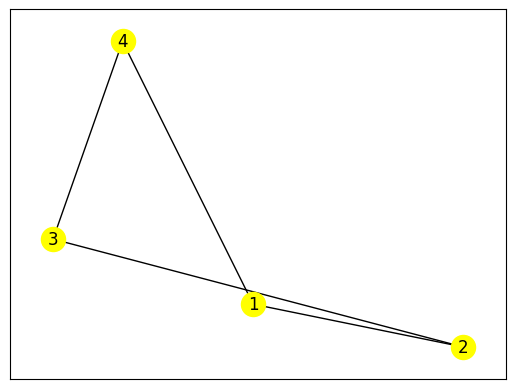

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

nodes = [1, 2, 3, 4]
edges = [(1, 2), (2, 3), (3, 4), (4, 1)]
G = nx.Graph()

for node in nodes:
    G.add_node(node)
G.add_edges_from(edges)
nx.draw_networkx(G, with_labels=True, node_color='yellow')
plt.show()

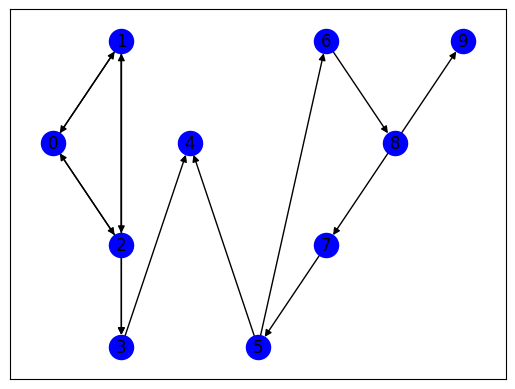

In [9]:
nodes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
            (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
            (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G = nx.DiGraph()

for node in nodes:
    G.add_node(node)
G.add_edges_from(edges)

pos = [(1, 3), (2, 4), (2, 2),  (2, 1),  (3, 3),  (4, 1),  (5, 4),  (5, 2),  (6, 3), (7, 4)] 

nx.draw_networkx(G, pos, with_labels=True, node_color='blue')
plt.show()

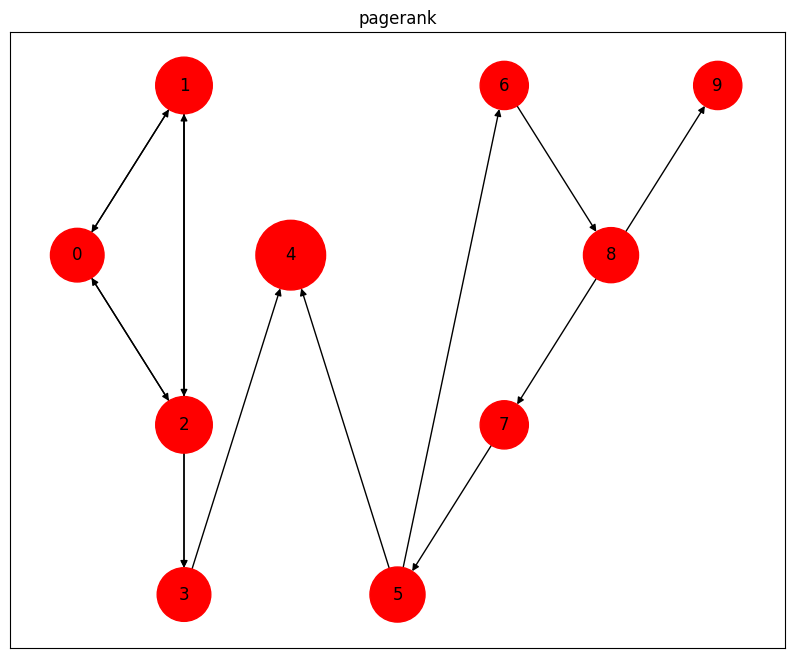

In [11]:
d = 0.9
N = len(G.nodes())  
max_iter = 30  
tol = 1e-5  

pagerank = {node: 1 / N for node in G.nodes()}

for i in range(max_iter):
    new_pagerank = {}
    for node in G.nodes():
        rank_sum = 0
        for neighbor in G.predecessors(node):
            rank_sum += pagerank[neighbor] / G.out_degree(neighbor)

        new_pagerank[node] = (1 - d) / N + d * rank_sum

    diff = sum(abs(new_pagerank[node] - pagerank[node]) for node in G.nodes())
    pagerank = new_pagerank
    if diff < tol:
        break

node_sizes = [np.log(pagerank[node] + 1)  * 50000  for node in G.nodes()]

plt.figure(figsize=(10, 8))
pos = [(1, 3), (2, 4), (2, 2),  (2, 1),  (3, 3),  (4, 1),  (5, 4),  (5, 2),  (6, 3), (7, 4)] 
nx.draw_networkx(
    G, 
    pos, 
    with_labels=True, 
    node_size=node_sizes, 
    node_color='red', 
)
plt.title("pagerank")
plt.show()
